In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import json

In [84]:
path_to_gened_gen_data = '../gen-data/gened'
path_to_reged_gen_data = '../gen-data/reged'
path_to_genuned_gen_data = '../gen-data/genuned'
path_to_reguned_gen_data = '../gen-data/reguned'
path_to_perlin_gen_data = '../gen-data/flat'

path_to_maps = '../validation-data'

gened_gen_data = []
reged_gen_data = []
genuned_gen_data = []
reguned_gen_data = []
perlin_gen_data = []

# read json data from .json files
for filename in os.listdir(path_to_gened_gen_data):
    if filename.endswith('.json'):
        case = filename.split('-')[0]
        gened_gen_data.append(pd.read_json(os.path.join(path_to_gened_gen_data, filename)))

for filename in os.listdir(path_to_reged_gen_data):
    if filename.endswith('.json'):
        reged_gen_data.append(pd.read_json(os.path.join(path_to_reged_gen_data, filename)))
        
for filename in os.listdir(path_to_genuned_gen_data):
    if filename.endswith('.json'):
        genuned_gen_data.append(pd.read_json(os.path.join(path_to_genuned_gen_data, filename)))
        
for filename in os.listdir(path_to_reguned_gen_data):
    if filename.endswith('.json'):
        reguned_gen_data.append(pd.read_json(os.path.join(path_to_reguned_gen_data, filename)))
        
for filename in os.listdir(path_to_perlin_gen_data):
    if filename.endswith('.json'):
        perlin_gen_data.append(pd.read_json(os.path.join(path_to_perlin_gen_data, filename)))
        
for filename in os.listdir(path_to_maps):
    if 'perlin' in filename and filename.endswith('.json'):
        with open(os.path.join(path_to_maps, filename)) as f:
            perlin_maps = json.load(f)
            
    if 'gen' in filename and filename.endswith('.json'):
        if 'edited' in filename:
            with open(os.path.join(path_to_maps, filename)) as f:
                gened_maps = json.load(f)
        else:
            with open(os.path.join(path_to_maps, filename)) as f:
                genuned_maps = json.load(f)
    if 'rand' in filename and filename.endswith('.json'):
        if 'edited' in filename:
            with open(os.path.join(path_to_maps, filename)) as f:
                reged_maps = json.load(f)
        else:
            with open(os.path.join(path_to_maps, filename)) as f:
                reguned_maps = json.load(f)
        

gened_maps = pd.json_normalize(gened_maps)
reged_maps = pd.json_normalize(reged_maps)
genuned_maps = pd.json_normalize(genuned_maps)
reguned_maps = pd.json_normalize(reguned_maps)
perlin_maps = pd.json_normalize(perlin_maps)




In [ ]:
scores_per_gen = []
fitness_per_gen = []
timed_out_per_gen = []

# Loop through each generation's data
for gen_data in gened_gen_data['populationData']:
    scores = [player['score'] for player in gen_data['players']]
    fitness = [player['fitness'] for player in gen_data['players']]
    timed_out = [player['timedOut'] for player in gen_data['players']]
    
    scores_per_gen.append(scores)
    fitness_per_gen.append(fitness)
    timed_out_per_gen.append(timed_out)

# Compute averages and best values for each generation
average_scores = [np.mean(scores) for scores in scores_per_gen]
best_scores = [np.max(scores) for scores in scores_per_gen]

average_fitness = [np.mean(fitness) for fitness in fitness_per_gen]
best_fitness = [np.max(fitness) for fitness in fitness_per_gen]

average_timed_out = [np.mean(timed_out) for timed_out in timed_out_per_gen]

# Output the results
# for i, (avg_score, best_score, avg_fit, best_fit, avg_timed_out) in enumerate(zip(average_scores, best_scores, average_fitness, best_fitness, average_timed_out)):
    # print(f"Generation {i}:")
    # print(f"  Average Score: {avg_score:.2f}, Best Score: {best_score:.2f}")
    # print(f"  Average Fitness: {avg_fit:.2f}, Best Fitness: {best_fit:.2f}")
    # print(f"  Average Timed Out: {avg_timed_out:.2f}")

In [85]:
# Dictionary to store all results
all_results_gened = {}
all_results_reged = {}
all_results_genuned = {}
all_results_reguned = {}
all_results_perlin = {}

# Function to extract scores, fitness, and timedOut from the data
def extract_gen_data(gen_data):
    scores_per_gen = []
    fitness_per_gen = []
    timed_out_per_gen = []

    # Loop through each generation's data
    #print(gen_data)
    for generation in gen_data['populationData']:
        players = gen_data['populationData'][str(generation)]['players']
        if players:
            scores = [player.get('score', 0) for player in players]
            fitness = [player.get('fitness', 0) for player in players]
            timed_out = [player.get('timedOut', False) for player in players]

            scores_per_gen.append(scores)
            fitness_per_gen.append(fitness)
            timed_out_per_gen.append(timed_out)

    if not scores_per_gen:
        return [], [], [], [], []

    # Compute averages and best values for each generation
    average_scores = [np.mean(scores) for scores in scores_per_gen]
    best_scores = [np.max(scores) for scores in scores_per_gen]

    average_fitness = [np.mean(fitness) for fitness in fitness_per_gen]
    best_fitness = [np.max(fitness) for fitness in fitness_per_gen]

    average_timed_out = [np.mean(timed_out) for timed_out in timed_out_per_gen]

    return average_scores, best_scores, average_fitness, best_fitness, average_timed_out

# Read and process JSON files
print('PRINTING GENED------------------------------------------------------------------')
for filename in os.listdir(path_to_gened_gen_data):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_gened_gen_data, filename)) as f:
            gened_gen_data = json.load(f)
            avg_scores, best_scores, avg_fitness, best_fitness, avg_timed_out = extract_gen_data(gened_gen_data)
            
            # Check if we got any valid data before saving it
            if avg_scores:
                print(f"Results for gened {filename}:")
                print(f"  Average Score: {avg_scores[-1]:.2f}, Best Score: {best_scores[-1]:.2f}")
                
                # Save the results for this file
                all_results_gened[filename] = {
                    'average_scores': avg_scores,
                    'best_scores': best_scores,
                    'average_fitness': avg_fitness,
                    'best_fitness': best_fitness,
                    'average_timed_out': avg_timed_out,
                }
            else:
                print(f"No valid data found in {filename}")
print('PRINTING reged------------------------------------------------------------------')
for filename in os.listdir(path_to_reged_gen_data):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_reged_gen_data, filename)) as f:
            reged_gen_data = json.load(f)
            avg_scores, best_scores, avg_fitness, best_fitness, avg_timed_out = extract_gen_data(reged_gen_data)
            
            # Check if we got any valid data before saving it
            if avg_scores:
                print(f"Results for reged {filename}:")
                print(f"  Average Score: {avg_scores[-1]:.2f}, Best Score: {best_scores[-1]:.2f}")
                
                # Save the results for this file
                all_results_reged[filename] = {
                    'average_scores': avg_scores,
                    'best_scores': best_scores,
                    'average_fitness': avg_fitness,
                    'best_fitness': best_fitness,
                    'average_timed_out': avg_timed_out,
                }
            else:
                print(f"No valid data found in {filename}")
print('PRINTING GENUNED------------------------------------------------------------------')
for filename in os.listdir(path_to_genuned_gen_data):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_genuned_gen_data, filename)) as f:
            genuned_gen_data = json.load(f)
            avg_scores, best_scores, avg_fitness, best_fitness, avg_timed_out = extract_gen_data(genuned_gen_data)
            
            # Check if we got any valid data before saving it
            if avg_scores:
                print(f"Results for genuned {filename}:")
                print(f"  Average Score: {avg_scores[-1]:.2f}, Best Score: {best_scores[-1]:.2f}")
                
                # Save the results for this file
                all_results_genuned[filename] = {
                    'average_scores': avg_scores,
                    'best_scores': best_scores,
                    'average_fitness': avg_fitness,
                    'best_fitness': best_fitness,
                    'average_timed_out': avg_timed_out,
                }
            else:
                print(f"No valid data found in {filename}")
print('PRINTING REGUNED -----------------------------------------------------------------')   
for filename in os.listdir(path_to_reguned_gen_data):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_reguned_gen_data, filename)) as f:
            reguned_gen_data = json.load(f)
            avg_scores, best_scores, avg_fitness, best_fitness, avg_timed_out = extract_gen_data(reguned_gen_data)
            
            # Check if we got any valid data before saving it
            if avg_scores:
                print(f"Results for reguned {filename}:")
                print(f"  Average Score: {avg_scores[-1]:.2f}, Best Score: {best_scores[-1]:.2f}")
                
                # Save the results for this file
                all_results_reguned[filename] = {
                    'average_scores': avg_scores,
                    'best_scores': best_scores,
                    'average_fitness': avg_fitness,
                    'best_fitness': best_fitness,
                    'average_timed_out': avg_timed_out,
                }
            else:
                print(f"No valid data found in {filename}")
                
print('PRINTING PERLIN------------------------------------------------------------------')
for filename in os.listdir(path_to_perlin_gen_data):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_perlin_gen_data, filename)) as f:
            perlin_gen_data = json.load(f)
            avg_scores, best_scores, avg_fitness, best_fitness, avg_timed_out = extract_gen_data(perlin_gen_data)
            
            # Check if we got any valid data before saving it
            if avg_scores:
                print(f"Results for perlin {filename}:")
                print(f"  Average Score: {avg_scores[-1]:.2f}, Best Score: {best_scores[-1]:.2f}")
                
                # Save the results for this file
                all_results_perlin[filename] = {
                    'average_scores': avg_scores,
                    'best_scores': best_scores,
                    'average_fitness': avg_fitness,
                    'best_fitness': best_fitness,
                    'average_timed_out': avg_timed_out,
                }
                
                # print all_results_perlin
                #for key, value in all_results_perlin.items():
                    #print(key, ' : ', value)
            else:
                print(f"No valid data found in {filename}")

# To compare across files and generations, you can now access all_results_gened

# Example: Printing results for each file
# for filename, data in all_results_gened.items():
#     print(f"Results for {filename}:")
#     for i, (avg_score, best_score, avg_fit, best_fit, avg_timed_out) in enumerate(zip(data['average_scores'], data['best_scores'], data['average_fitness'], data['best_fitness'], data['average_timed_out'])):
#         print(f"  Generation {i + 1}:")
#         print(f"    Average Score: {avg_score:.2f}, Best Score: {best_score:.2f}")
#         print(f"    Average Fitness: {avg_fit:.2f}, Best Fitness: {best_fit:.2f}")
#         print(f"    Average Timed Out: {avg_timed_out:.2f}")

#On the same plot draw out the average score for each generation for each of the 4 files
# gened
# reged
# genuned
# reguned



PRINTING GENED------------------------------------------------------------------
Results for gened generation-1.json:
  Average Score: 225.10, Best Score: 1139.00
Results for gened generation-10.json:
  Average Score: 578.27, Best Score: 1355.00
Results for gened generation-11.json:
  Average Score: 155.65, Best Score: 279.00
Results for gened generation-12.json:
  Average Score: 241.03, Best Score: 697.00
Results for gened generation-2.json:
  Average Score: 290.70, Best Score: 1197.00
Results for gened generation-3.json:
  Average Score: 402.08, Best Score: 1560.00
Results for gened generation-4.json:
  Average Score: 411.03, Best Score: 1520.00
Results for gened generation-5.json:
  Average Score: 716.05, Best Score: 1582.00
Results for gened generation-6.json:
  Average Score: 494.65, Best Score: 1076.00
Results for gened generation-7.json:
  Average Score: 80.62, Best Score: 101.00
Results for gened generation-8.json:
  Average Score: 272.50, Best Score: 514.00
Results for gened g

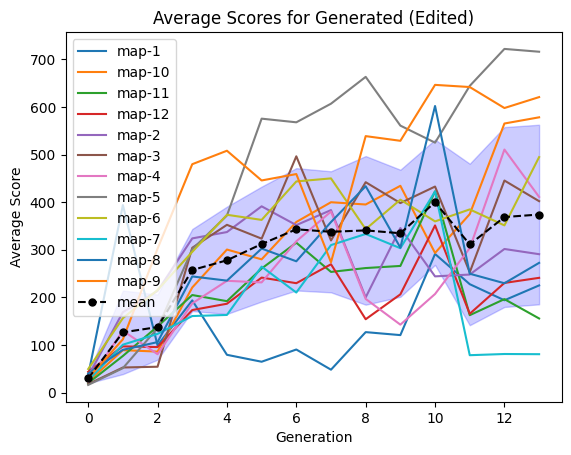

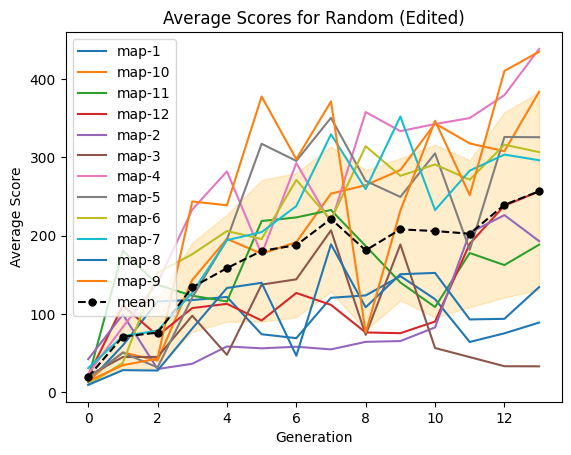

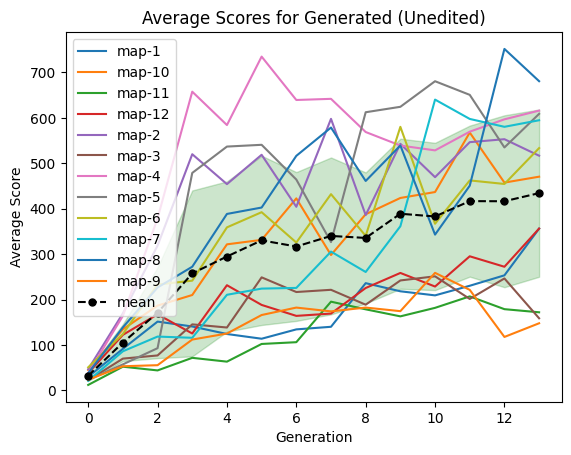

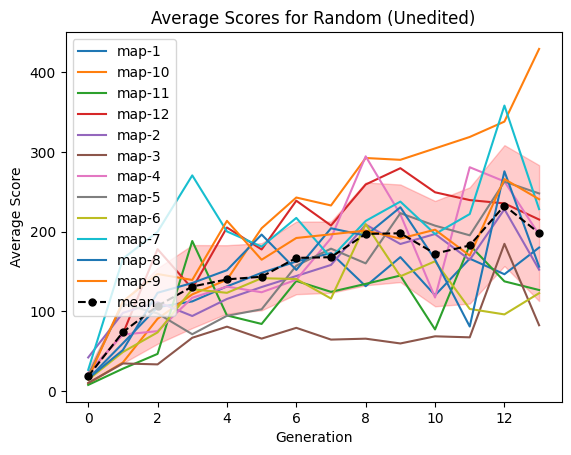

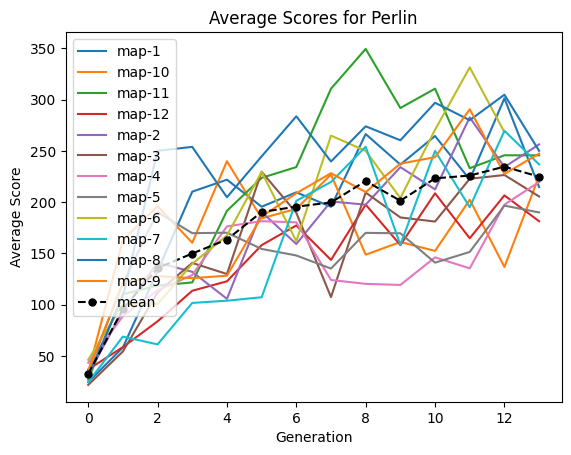

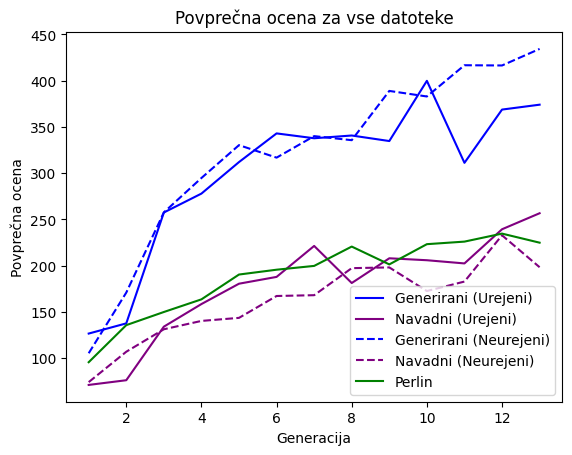

In [89]:

# Function to calculate the mean across all files
def calculate_mean(data_dict):
    num_generations = len(next(iter(data_dict.values()))['average_scores'])
    mean_scores = np.zeros(num_generations)
    for data in data_dict.values():
        mean_scores += np.array(data['average_scores'])
    mean_scores /= len(data_dict)
    return mean_scores

# Function to calculate the mean across perlin files
def calculate_mean_perlin(data_dict):
# Function to calculate the mean across all files
    # Find the maximum length of the arrays
    max_length = max(len(data['average_scores']) for data in data_dict.values())
    
    # Initialize the mean_scores array with zeros
    mean_scores = np.zeros(max_length)
    
    # Initialize a count array to track the number of elements summed for each position
    count = np.zeros(max_length)
    
    for data in data_dict.values():
        scores = np.array(data['average_scores'])
        length = len(scores)
        
        # Add the scores to mean_scores, and update the count for each position
        mean_scores[:length] += scores
        count[:length] += 1
    
    # Divide by the count to get the mean
    mean_scores /= count
    
    return mean_scores

# Function to calculate the standard deviation across all files
def calculate_std(data_dict):
    num_generations = len(next(iter(data_dict.values()))['average_scores'])
    mean_scores = calculate_mean(data_dict)
    std_scores = np.zeros(num_generations)
    for data in data_dict.values():
        std_scores += (np.array(data['average_scores']) - mean_scores) ** 2
    std_scores = np.sqrt(std_scores / len(data_dict))
    return std_scores

# Plot for Generated (Edited)
plt.figure()
for filename, data in all_results_gened.items():
    new_name = filename.split('.')[0]
    # replace "generation" in filename with "map"
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_scores'], label=new_name)
mean_scores_gened = calculate_mean(all_results_gened)
std_scores_gened = calculate_std(all_results_gened)
plt.plot(mean_scores_gened, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_scores_gened)), mean_scores_gened - std_scores_gened, mean_scores_gened + std_scores_gened, color='blue', alpha=0.2)
plt.title('Average Scores for Generated (Edited)')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Plot for Random (Edited)
plt.figure()
for filename, data in all_results_reged.items():
    new_name = filename.split('.')[0]
    # replace "generation" in filename with "map"
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_scores'], label=new_name)
mean_scores_reged = calculate_mean(all_results_reged)
std_scores_reged = calculate_std(all_results_reged)
plt.plot(mean_scores_reged, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_scores_reged)), mean_scores_reged - std_scores_reged, mean_scores_reged + std_scores_reged, color='orange', alpha=0.2)
plt.title('Average Scores for Random (Edited)')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Plot for Generated (Unedited)
plt.figure()
for filename, data in all_results_genuned.items():
    new_name = filename.split('.')[0]
    # replace "generation" in filename with "map"
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_scores'], label=new_name)
mean_scores_genuned = calculate_mean(all_results_genuned)
std_scores_genuned = calculate_std(all_results_genuned)
plt.plot(mean_scores_genuned, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_scores_genuned)), mean_scores_genuned - std_scores_genuned, mean_scores_genuned + std_scores_genuned, color='green', alpha=0.2)
plt.title('Average Scores for Generated (Unedited)')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Plot for Random (Unedited)
plt.figure()
for filename, data in all_results_reguned.items():
    new_name = filename.split('.')[0]
    # replace "generation" in filename with "map"
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_scores'], label=new_name)
mean_scores_reguned = calculate_mean(all_results_reguned)
std_scores_reguned = calculate_std(all_results_reguned)
plt.plot(mean_scores_reguned, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_scores_reguned)), mean_scores_reguned - std_scores_reguned, mean_scores_reguned + std_scores_reguned, color='red', alpha=0.2)
plt.title('Average Scores for Random (Unedited)')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Plot for Perlin
plt.figure()
for filename, data in all_results_perlin.items():
    new_name = filename.split('.')[0]
    # replace "generation" in filename with "map"
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_scores'], label=new_name)
mean_scores_perlin = calculate_mean_perlin(all_results_perlin)
#std_scores_perlin = calculate_std(all_results_perlin)
plt.plot(mean_scores_perlin, label='mean', color='black', linestyle='--', marker='o', markersize=5)
#plt.fill_between(range(len(mean_scores_perlin)), mean_scores_perlin - std_scores_perlin, mean_scores_perlin + std_scores_perlin, color='purple', alpha=0.2)
plt.title('Average Scores for Perlin')
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.legend()
plt.show()

mean_scores_gened[0] = None
mean_scores_genuned[0] = None
mean_scores_reged[0] = None
mean_scores_reguned[0] = None
mean_scores_perlin[0] = None

# Plot the means of all 4 files on the same plot
plt.figure()
plt.plot(mean_scores_gened, label='Generirani (Urejeni)', color='blue')
plt.plot(mean_scores_reged, label='Navadni (Urejeni)', color='purple')
plt.plot(mean_scores_genuned, label='Generirani (Neurejeni)', color='blue', linestyle='--')
plt.plot(mean_scores_reguned, label='Navadni (Neurejeni)', color='purple', linestyle='--')
plt.plot(mean_scores_perlin, label='Perlin', color='green', linestyle='-')
plt.title('Povprečna ocena za vse datoteke')
plt.xlabel('Generacija')
plt.ylabel('Povprečna ocena')
plt.legend()
plt.savefig('../graphs/AllFilesAvg.png', dpi=1200, bbox_inches='tight', pad_inches=0.1)

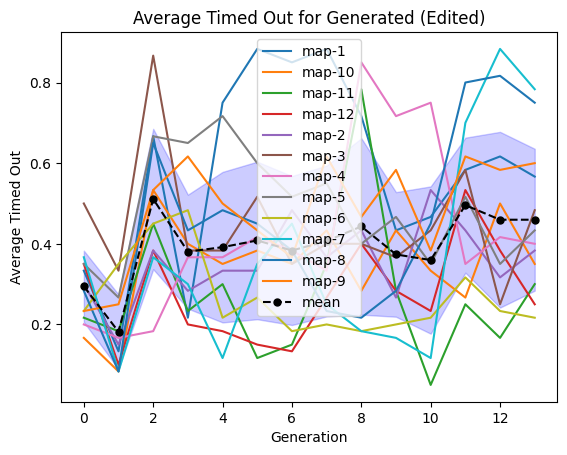

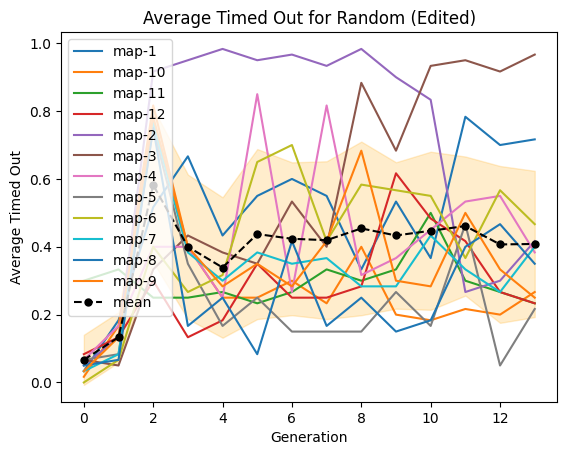

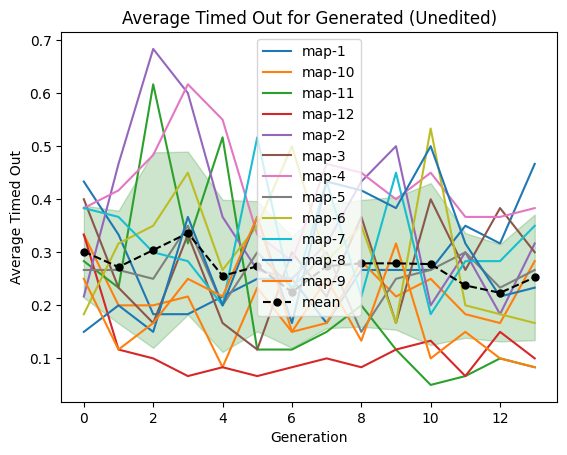

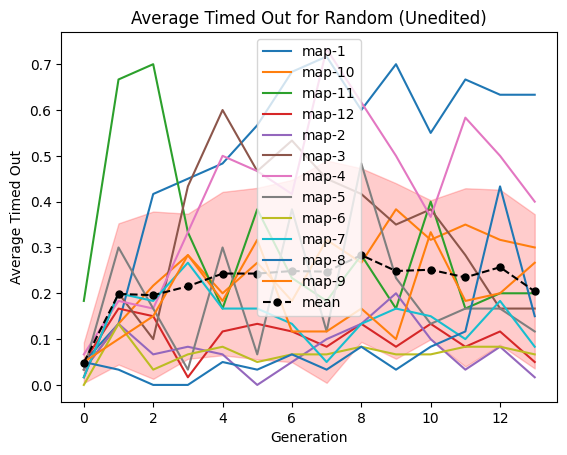

Mean Timed Out for Generated (Edited): [       nan 0.18194444 0.51111111 0.38055556 0.39166667 0.40833333
 0.38333333 0.40694444 0.44305556 0.37361111 0.35972222 0.49583333
 0.45972222 0.45972222]
Mean Timed Out for Random (Edited): [       nan 0.13333333 0.58194444 0.4        0.33888889 0.4375
 0.42361111 0.41944444 0.45416667 0.43333333 0.44722222 0.46111111
 0.40694444 0.40833333]
Mean Timed Out for Generated (Unedited): [       nan 0.27222222 0.30416667 0.33611111 0.25555556 0.27361111
 0.225      0.27361111 0.27916667 0.27916667 0.27777778 0.2375
 0.22361111 0.25277778]
Mean Timed Out for Random (Unedited): [       nan 0.19861111 0.19583333 0.21527778 0.24305556 0.24305556
 0.24861111 0.24722222 0.28333333 0.24861111 0.25138889 0.23472222
 0.25694444 0.20416667]


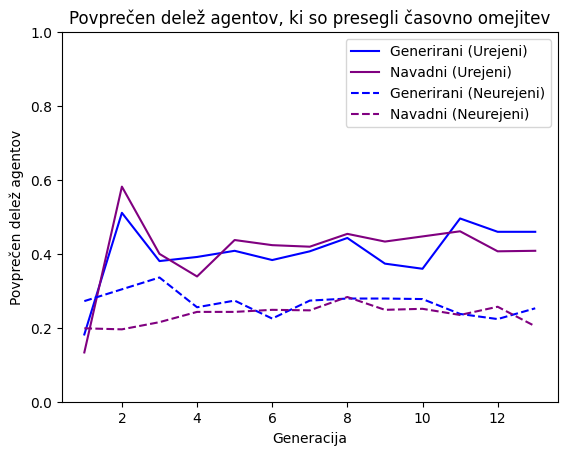

In [67]:
# Function to calculate the mean across all files
def calculate_mean(data_dict, key):
    num_generations = len(next(iter(data_dict.values()))[key])
    mean_scores = np.zeros(num_generations)
    for data in data_dict.values():
        mean_scores += np.array(data[key])
    mean_scores /= len(data_dict)
    return mean_scores

# Function to calculate the mean across perlin files
def calculate_mean_perlin(data_dict, key):
    # Find the maximum length of the arrays
    max_length = max(len(data[key]) for data in data_dict.values())
    
    # Initialize the mean_scores array with zeros
    mean_scores = np.zeros(max_length)
    
    # Initialize a count array to track the number of elements summed for each position
    count = np.zeros(max_length)
    
    for data in data_dict.values():
        scores = np.array(data[key])
        length = len(scores)
        
        # Add the scores to mean_scores, and update the count for each position
        mean_scores[:length] += scores
        count[:length] += 1
    
    # Divide by the count to get the mean
    mean_scores /= count
    
    return mean_scores

# Function to calculate the standard deviation across all files
def calculate_std(data_dict, key):
    num_generations = len(next(iter(data_dict.values()))[key])
    mean_scores = calculate_mean(data_dict, key)
    std_scores = np.zeros(num_generations)
    for data in data_dict.values():
        std_scores += (np.array(data[key]) - mean_scores) ** 2
    std_scores = np.sqrt(std_scores / len(data_dict))
    return std_scores

# Plot for Generated (Edited) - Timed Out
plt.figure()
for filename, data in all_results_gened.items():
    new_name = filename.split('.')[0]
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_timed_out'], label=new_name)
mean_timed_out_gened = calculate_mean(all_results_gened, 'average_timed_out')
std_timed_out_gened = calculate_std(all_results_gened, 'average_timed_out')
plt.plot(mean_timed_out_gened, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_timed_out_gened)), mean_timed_out_gened - std_timed_out_gened, mean_timed_out_gened + std_timed_out_gened, color='blue', alpha=0.2)
plt.title('Average Timed Out for Generated (Edited)')
plt.xlabel('Generation')
plt.ylabel('Average Timed Out')
plt.legend()
plt.show()

# Plot for Random (Edited) - Timed Out
plt.figure()
for filename, data in all_results_reged.items():
    new_name = filename.split('.')[0]
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_timed_out'], label=new_name)
mean_timed_out_reged = calculate_mean(all_results_reged, 'average_timed_out')
std_timed_out_reged = calculate_std(all_results_reged, 'average_timed_out')
plt.plot(mean_timed_out_reged, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_timed_out_reged)), mean_timed_out_reged - std_timed_out_reged, mean_timed_out_reged + std_timed_out_reged, color='orange', alpha=0.2)
plt.title('Average Timed Out for Random (Edited)')
plt.xlabel('Generation')
plt.ylabel('Average Timed Out')
plt.legend()
plt.show()

# Plot for Generated (Unedited) - Timed Out
plt.figure()
for filename, data in all_results_genuned.items():
    new_name = filename.split('.')[0]
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_timed_out'], label=new_name)
mean_timed_out_genuned = calculate_mean(all_results_genuned, 'average_timed_out')
std_timed_out_genuned = calculate_std(all_results_genuned, 'average_timed_out')
plt.plot(mean_timed_out_genuned, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_timed_out_genuned)), mean_timed_out_genuned - std_timed_out_genuned, mean_timed_out_genuned + std_timed_out_genuned, color='green', alpha=0.2)
plt.title('Average Timed Out for Generated (Unedited)')
plt.xlabel('Generation')
plt.ylabel('Average Timed Out')
plt.legend()
plt.show()

# Plot for Random (Unedited) - Timed Out
plt.figure()
for filename, data in all_results_reguned.items():
    new_name = filename.split('.')[0]
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_timed_out'], label=new_name)
mean_timed_out_reguned = calculate_mean(all_results_reguned, 'average_timed_out')
std_timed_out_reguned = calculate_std(all_results_reguned, 'average_timed_out')
plt.plot(mean_timed_out_reguned, label='mean', color='black', linestyle='--', marker='o', markersize=5)
plt.fill_between(range(len(mean_timed_out_reguned)), mean_timed_out_reguned - std_timed_out_reguned, mean_timed_out_reguned + std_timed_out_reguned, color='red', alpha=0.2)
plt.title('Average Timed Out for Random (Unedited)')
plt.xlabel('Generation')
plt.ylabel('Average Timed Out')
plt.legend()
plt.show()

# Plot for Perlin - Timed Out
plt.figure()
for filename, data in all_results_perlin.items():
    new_name = filename.split('.')[0]
    new_name = new_name.replace('generation', 'map')
    plt.plot(data['average_timed_out'], label=new_name)
mean_timed_out_perlin = calculate_mean_perlin(all_results_perlin, 'average_timed_out')
#std_timed_out_perlin = calculate_std(all_results_perlin, 'average_timed_out')
plt.plot(mean_timed_out_perlin, label='mean', color='black', linestyle='--', marker='o', markersize=5)
#plt.fill_between(range(len(mean_timed_out_perlin)), mean_timed_out_perlin - std_timed_out_perlin, mean_timed_out_perlin + std_timed_out_perlin, color='purple', alpha=0.2)
plt.title('Average Timed Out for Perlin')
plt.xlabel('Generation')
plt.ylabel('Average Timed Out')
plt.legend()
plt.show()




mean_timed_out_gened[0] = None
mean_timed_out_reged[0] = None
mean_timed_out_genuned[0] = None
mean_timed_out_reguned[0] = None
mean_timed_out_perlin[0] = None

# Finally, plot the means of all files for timedOut on the same plot:
plt.figure()
plt.plot(mean_timed_out_gened, label='Generirani (Urejeni)', color='blue')
plt.plot(mean_timed_out_reged, label='Navadni (Urejeni)', color='purple')
plt.plot(mean_timed_out_genuned, label='Generirani (Neurejeni)', color='blue', linestyle='--')
plt.plot(mean_timed_out_reguned, label='Navadni (Neurejeni)', color='purple', linestyle='--')
plt.plot(mean_timed_out_perlin, label='Perlin', color='green', linestyle='-')
plt.title('Povprečen delež agentov, ki so presegli časovno omejitev')
plt.xlabel('Generacija')
plt.ylabel('Povprečen delež agentov')
plt.ylim(0, 1)
plt.legend()
plt.savefig('../graphs/AvgTimeOutAll.png', dpi=1200, bbox_inches='tight', pad_inches=0.1)

# timed out mean print out
print("Mean Timed Out for Generated (Edited):", mean_timed_out_gened)
print("Mean Timed Out for Random (Edited):", mean_timed_out_reged)
print("Mean Timed Out for Generated (Unedited):", mean_timed_out_genuned)
print("Mean Timed Out for Random (Unedited):", mean_timed_out_reguned)



In [ ]:
ground_data = {}

for filename in os.listdir(path_to_maps):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_maps, filename)) as f:
            ground_data[filename] = json.load(f)
            
#for filename, data in ground_data.items():
    # print(f"Results for {filename}:")
    # print(data['segments'])
    
# Plot each map's segments
for filename, data in ground_data.items():
    x_coords = [segment['x'] for segment in data['segments']]
    y_coords = [segment['y'] for segment in data['segments']]
    
    # Plotting the segments
    plt.figure()
    plt.plot(x_coords, y_coords, marker='o')
    
    # Invert the y-axis
    plt.gca().invert_yaxis()
    plt.ylim(0, 85)
    plt.xlim(0, 400)
    
    # Set the title and labels
    plt.title(f"Map Segments for {filename}")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    # Show the plot
    plt.show()

In [53]:
import os
import json
import matplotlib.pyplot as plt

# Dictionary to store map data
ground_data = {}

# Load the data from the JSON files
for filename in os.listdir(path_to_maps):
    if filename.endswith('.json'):
        with open(os.path.join(path_to_maps, filename)) as f:
            ground_data[filename] = json.load(f)

# Function to plot the map segments
def plot_map_pair(regular_file, edited_file):
    regular_data = ground_data.get(regular_file, None)
    edited_data = ground_data.get(edited_file, None)
    
    if regular_data and edited_data:
        # Extract x and y coordinates for regular and edited versions
        x_coords_regular = [segment['x'] for segment in regular_data['segments']]
        y_coords_regular = [segment['y'] for segment in regular_data['segments']]
        x_coords_edited = [segment['x'] for segment in edited_data['segments']]
        y_coords_edited = [segment['y'] for segment in edited_data['segments']]
        
        # Plotting the segments
        plt.figure()
        plt.plot(x_coords_edited, y_coords_edited, color='red', alpha=0.5, label=f'Urejen nivo', zorder=1, linewidth=5)
        plt.plot(x_coords_regular, y_coords_regular, color='blue', alpha=0.5, label=f'Neurejen nivo', zorder=1, linewidth=5)
        
        # Invert the y-axis and set limits
        plt.gca().invert_yaxis()
        plt.ylim(0, 40)
        plt.xlim(0, 422)
        
        reg_title_temp = regular_file.split('.')[0]
        reg_level_num = reg_title_temp.split('-')[-1]
        if('gen' in reg_title_temp):
            reg_title_temp = f'Generiran nivo {reg_level_num} (neurejen)'
        else:
            reg_title_temp =f'Navaden nivo {reg_level_num} (neurejen)'
            
        edit_title_temp = edited_file.split('.')[0]
        edit_level_num = edit_title_temp.split('-')[-2]
        if('gen' in edit_title_temp):
            edit_title_temp = f'Generiran nivo {edit_level_num} (urejen)'
        else:
            edit_title_temp = f'Navaden nivo {edit_level_num} (urejen)'
        # Set the title and labels
        plt.title(f"Primerjava segmentev nivojev: {reg_title_temp} vs {edit_title_temp}")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        
        # Show the plot
        # plt.show()
        
        if('Generiran nivo 3' in reg_title_temp):
            #save figure as svg
            plt.savefig('../graphs/Rand2MapCompare.png', dpi=1200, bbox_inches='tight', pad_inches=0.1)
            
        if('Navaden nivo 10' in reg_title_temp):
            #save figure as svg
            plt.savefig('../graphs/Rand10MapCompare.png', dpi=1200, bbox_inches='tight', pad_inches=0.1)
            
        if('Generiran nivo 7' in reg_title_temp):
            #save figure as svg
            plt.savefig('../graphs/Gen7MapCompare.png', dpi=1200, bbox_inches='tight', pad_inches=0.1)
            
        if('Generiran nivo 10' in reg_title_temp):
            #save figure as svg
            plt.savefig('../graphs/Gen10MapCompare.png', dpi=1200, bbox_inches='tight', pad_inches=0.1)
            
        plt.close()

# Loop through and plot pairs
for i in range(1, 13):
    plot_map_pair(f'gen-ground-{i}.json', f'gen-ground-{i}-edited.json')
    plot_map_pair(f'rand-ground-{i}.json', f'rand-ground-{i}-edited.json')
